# Assign topics to fairy tales

In [3]:
from gensim import corpora, models, similarities, matutils
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics import pairwise_distances

In [4]:
with open('pickle_files/lda_bestmodel.pickle','rb') as read_file:
    model= pickle.load(read_file)
with open('pickle_files/lda_doc_term.pickle','rb') as read_file:
    doc_term= pickle.load(read_file)
with open('pickle_files/clean_story.pickle','rb') as read_file:
    clean_story= pickle.load(read_file)
with open('pickle_files/story_info.pickle','rb') as read_file:
    story_info= pickle.load(read_file)
with open('pickle_files/all_story.pickle','rb') as read_file:
    all_story= pickle.load(read_file)
with open('pickle_files/tfidf.pickle','rb') as read_file:
    tfidf= pickle.load(read_file)

In [5]:
lda_model = model[0]
lda_topics = model[1]

In [6]:
def lda_doc_topic(doc_term, model):
    corpus = matutils.Sparse2Corpus(doc_term.transpose())
    lda_corpus = model[corpus]
    lda_docs = [doc for doc in lda_corpus]
    doc_topic = []
    for doc in lda_docs:
        doc.sort(key=lambda tup: tup[1], reverse=True) # choose the topic with the highest probability
        doc_topic.append(doc[0][0]) # the list of topics for the whole dataset
    return pd.Series(doc_topic, name = 'topic_name'),lda_docs

In [7]:
topic_list, topic_space = lda_doc_topic(doc_term, lda_model)

In [8]:
story_and_topic = pd.concat([all_story, topic_list], axis = 1)
story_and_topic.loc[(story_and_topic.topic_name == 0), 'topic_name'] = 'Poor vs. Rich'
story_and_topic.loc[(story_and_topic.topic_name == 1), 'topic_name'] = 'Holiday'
story_and_topic.loc[(story_and_topic.topic_name == 2), 'topic_name'] = 'Family'
story_and_topic.loc[(story_and_topic.topic_name == 3), 'topic_name'] = 'Farm'
story_and_topic.loc[(story_and_topic.topic_name == 4), 'topic_name'] = 'Humans & Animals'
story_and_topic.loc[(story_and_topic.topic_name == 5), 'topic_name'] = 'Humans & Animals'
story_and_topic.loc[(story_and_topic.topic_name == 6), 'topic_name'] = 'Nature'
story_and_topic.loc[(story_and_topic.topic_name == 7), 'topic_name'] = 'Animal Characters'
story_and_topic.loc[(story_and_topic.topic_name == 8), 'topic_name'] = 'Animal Characters'
story_and_topic.loc[(story_and_topic.topic_name == 9), 'topic_name'] = 'Love'

In [9]:
story_and_topic = pd.concat([story_and_topic, pd.Series(clean_story, name = 'clean_text')], axis = 1)

In [121]:
story_and_topic.topic_name.value_counts()/sum(story_and_topic.topic_name.value_counts())

Poor vs. Rich        0.243949
Humans & Animals     0.182484
Animal Characters    0.177070
Love                 0.157643
Holiday              0.135350
Nature               0.045860
Farm                 0.032484
Family               0.025159
Name: topic_name, dtype: float64

In [11]:
with open('pickle_files/story_and_topic.pickle', 'wb') as to_write:
    pickle.dump(story_and_topic, to_write)

In [12]:
# A dataframe of all the information
story_and_topic.head(5)

,title,author,region,country,continent_name,body,topic_name,clean_text
0,A Clever Thief,Hindu Tales from the Sanskrit,Indian,India,Asia,"Chapter I A certain man, named Hari-Sarman, wh...",Poor vs. Rich,chapter i a certain man name hari sarman w...
1,A Lac of Rupees for a Piece of Advice,Joseph Jacobs,Indian,India,Asia,A poor blind Brahman and his wife were depende...,Poor vs. Rich,a poor blind brahman and wife be dependent on...
2,A Leaf from the Sky,Hans Christian Andersen,Danish Nordic Scandinavian,Scandinavia,Europe,"High up yonder, in the thin clear air, flew an...",Animal Characters,high up yonder in the thin clear air fly a...
3,A Legend of Confucius,The Chinese Fairy Book,Chinese,China,Asia,"When Confucius came to the earth, the Kilin, t...",Love,when confucius come to the earth the kilin ...
4,A Lesson for Kings,Joseph Jacobs,Indian,India,Asia,"Once upon a time, when Brahma-datta was reigni...",Holiday,once upon a time when brahma datta be reign ...


In [77]:
story_and_topic.title.unique()

array(['A Clever Thief', 'A Lac of Rupees for a Piece of Advice',
       'A Leaf from the Sky', ..., 'Yuletide Specters',
       'Zlatovlaska the Golden-Haired: The Story of Yirik and the Snake',
       'Zoolvisia'], dtype=object)

# Recommender system

In [13]:
for doc in topic_space:
    doc.sort(key=lambda tup: tup[0])

In [14]:
# create a matrix with rows as documents and columns as topics

doc_topic = [ [ 0 for x in range(10) ] for x in range(len(topic_space))]
for docInd in range(len(topic_space)):
    for tupInd in range(len(topic_space[docInd])):
        doc_topic[docInd][tupInd] = topic_space[docInd][tupInd][1]
doc_topic = np.array(doc_topic)

In [75]:
with open('pickle_files/doc_topic.pickle', 'wb') as to_write:
    pickle.dump(doc_topic, to_write)

In [15]:
doc_topic_df = pd.DataFrame(doc_topic, columns = ['Poor_vs_Rich','Holiday','Family','Farm','HumansandAnimalsOne',
                                            'HumansandAnimalsTwo', 'Nature','AnimalCharactersOne','AnimalCharactersTwo',
                                            'Love'])
doc_topic_df.head(5)

,Poor_vs_Rich,Holiday,Family,Farm,HumansandAnimalsOne,HumansandAnimalsTwo,Nature,AnimalCharactersOne,AnimalCharactersTwo,Love
0,0.271771,0.131807,0.050790,0.016474,0.016484,0.093438,0.093067,0.062013,0.099519,0.164636
1,0.334888,0.099168,0.079954,0.018527,0.018452,0.111346,0.018509,0.018461,0.155102,0.145594
2,0.039565,0.175944,0.039880,0.039565,0.039733,0.039794,0.039581,0.039583,0.407006,0.139349
3,0.299138,0.046150,0.046029,0.046029,0.046029,0.046291,0.046560,0.046029,0.046029,0.331717
4,0.033344,0.560475,0.033423,0.033260,0.033260,0.033339,0.033260,0.033260,0.033365,0.173015


## User input

1. User select continent first, and a list of authors will be returned.

In [84]:
specific_continent = story_and_topic[story_and_topic.continent_name == 'Europe']

In [85]:
specific_continent.head(5)

,title,author,region,country,continent_name,body,topic_name,clean_text
2,A Leaf from the Sky,Hans Christian Andersen,Danish Nordic Scandinavian,Scandinavia,Europe,"High up yonder, in the thin clear air, flew an...",Animal Characters,high up yonder in the thin clear air fly a...
6,A Story from the Sand-Dunes,Hans Christian Andersen,Danish Nordic Scandinavian,Scandinavia,Europe,This is a story from the sand-dunes or sand-hi...,Humans & Animals,this be a story from the sand dune or sand hil...
7,Admetus and Alcestis,James Baldwin,Greek,Greece,Europe,Part I: The Slave IN a little town north of De...,Holiday,part i the slave in a little town north of d...
9,Aegir's Feast,Foster & Cummings,Nordic Scandinavian,Scandinavia,Europe,"I. Ægir was the ruler of the ocean, and his ho...",Humans & Animals,i ægir be the ruler of the ocean and home...
12,Alenoushka and her Brother,Arthur Ransome,Russian,Russia,Europe,Alenoushka and her Brother Once upon a time th...,Poor vs. Rich,alenoushka and brother once upon a time there...


2. User select one author, and a list of fairy tales will be returned.

In [86]:
specific_author = specific_continent[specific_continent.author == 'Brothers Grimm']

In [88]:
specific_author.head(5)

,title,author,region,country,continent_name,body,topic_name,clean_text
43,The Aged Mother,Brothers Grimm,German,Germany,Europe,In a large town there was an old woman who sat...,Holiday,in a large town there be an old woman who sit ...
45,The Alaraun,Brothers Grimm,German,Germany,Europe,"It is a well-known tradition near Magdeburg, t...",Humans & Animals,be a well know tradition near magdeburg tha...
82,Baba Yaga (Arthur Ransome version),Brothers Grimm,Russian,Russia,Europe,"“Tell us about Baba Yaga,” begged Maroosia. “Y...",Poor vs. Rich,""" tell about baba yaga "" beg maroosia "" yes..."
92,Bearskin,Brothers Grimm,German,Germany,Europe,There was once a young fellow who enlisted as ...,Poor vs. Rich,there be once a young fellow who enlist as a s...
131,Briar Rose,Brothers Grimm,German,Germany,Europe,A long time ago there were a King and Queen wh...,Animal Characters,a long time ago there be a king and queen who ...


3. User select one fairy tale from the list.

In [18]:
story = specific_author[specific_author.title == 'Mangita and Larina']

In [83]:
story

,title,author,region,country,continent_name,body,topic_name,clean_text
1632,Mangita and Larina,Brothers Grimm,Philippine,Philippines,Asia,This is a tale told in the lake district of Lu...,Animal Characters,this be a tale tell in the lake district of lu...


## Get recommendation

In [78]:
def get_recommendation(story,num_story = 5):
    """
    A function that takes the story returned from users' selection and gives recommendations in a dataframe.
    """
    distance_array = pairwise_distances(doc_topic[story.index].reshape(1,-1),doc_topic,metric='cosine')[0]
    sorted_distance = distance_array.argsort()
    recommend_index = sorted_distance[1:num_story+1]
    recommend_df = pd.DataFrame(columns = ['Title','Continent','Author'])
    for i in recommend_index:
        title = story_and_topic.loc[i,].title
        continent = story_and_topic.loc[i,].continent_name
        author = story_and_topic.loc[i,].author
        recommend_df = recommend_df.append({'Title': title,
                            'Continent': continent,
                            'Author': author}, ignore_index = True)
    return recommend_df

In [122]:
get_recommendation(story == story)

,Title,Continent,Author
0,The Husband of the Rat's Daughter,Africa,Andrew Lang’s Fairy Books
1,Princess Rosette,Europe,Charles Perrault
2,The Wolf and the Sheep,Europe,Aesop’s Fables
3,Death's Messengers,Europe,Brothers Grimm
4,The Turtle and His Bride,North America,Andrew Lang’s Fairy Books


# LDA Visualization

Dataset is too large to use pyLDAvis

In [21]:
# import pyLDAvis
# import pyLDAvis.gensim as gensimvis
# from matplotlib import pyplot as plt
# %matplotlib inline
# import seaborn as sns
# pyLDAvis.enable_notebook()

In [24]:
# doc_word = doc_term_sample.transpose()
# corpus = matutils.Sparse2Corpus(doc_word)
# text_list = [i.split() for i in clean_story]
# dictionary = corpora.Dictionary(text_list)

In [25]:
# vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

In [26]:
# pyLDAvis.display(vis_data)

# TSNE

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=5, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(doc_topic)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3140 samples in 0.003s...
[t-SNE] Computed neighbors for 3140 samples in 0.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3140
[t-SNE] Computed conditional probabilities for sample 2000 / 3140
[t-SNE] Computed conditional probabilities for sample 3000 / 3140
[t-SNE] Computed conditional probabilities for sample 3140 / 3140
[t-SNE] Mean sigma: 0.044894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.209152
[t-SNE] KL divergence after 1000 iterations: 1.520610


In [51]:
vis = pd.DataFrame(tsne_lda, columns = ['component1','component2'])
vis['Topic'] = story_and_topic.topic_name
vis.head(5)

,component1,component2,Topic
0,10.279127,-5.263760,Poor vs. Rich
1,19.749025,2.625111,Poor vs. Rich
2,-25.073570,13.468583,Animal Characters
3,21.843178,-13.741347,Love
4,-15.560996,-30.626011,Holiday


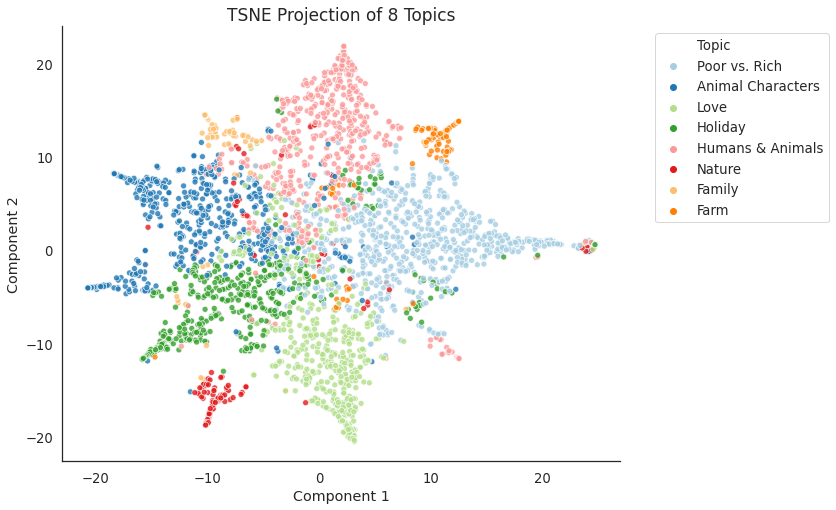

In [117]:
plt.figure(figsize=(10,8))

sns.set(font_scale=1.2)
sns.set_style("white")

sns.scatterplot(
    x=vis['component1'], y=vis['component2'],
    hue=vis['Topic'],
    palette=sns.color_palette("Paired",8),
    data=vis,
    legend="full",
    alpha=0.8
)
sns.despine()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
plt.title('TSNE Projection of 8 Topics', size = 17);

plt.savefig('tsne.png', bbox_inches="tight")

Topics don't have individual clusters.. But still separable.